In [1]:
#import the needed librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set()
from sklearn.cluster import KMeans

In [2]:
#Now let's get and put the data in  pandas dataframe

order_products_train = pd.read_csv('data/order_products.csv')

orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')

In [3]:
data1 = pd.merge(order_products_train, orders, on = "order_id", how = "left")

In [4]:
data2 = pd.merge(data1, products, on = "product_id", how = "left")

In [5]:
data3 = pd.merge(data2, aisles, on = "aisle_id", how = "left")

In [7]:
data3.head(10)

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle
0,2,33120,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs
1,2,28985,2,202279,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,202279,3,5,9,8.0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,202279,3,5,9,8.0,Coconut Butter,19,13,oils vinegars
4,2,30035,5,202279,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients
5,2,17794,6,202279,3,5,9,8.0,Carrots,83,4,fresh vegetables
6,2,40141,7,202279,3,5,9,8.0,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes
7,2,1819,8,202279,3,5,9,8.0,All Natural No Stir Creamy Almond Butter,88,13,spreads
8,2,43668,9,202279,3,5,9,8.0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits
9,3,33754,1,205970,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt


In [17]:
data = pd.pivot_table(data3, index="user_id", columns="aisle",values="order_id", aggfunc=np.size)
data.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,42.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
8,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,28.0


In [16]:
data = data.fillna(0)
data.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,28.0


In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled

array([[-0.13497103, -0.33922718, -0.07575701, ..., -0.37143228,
        -0.08668691, -0.28458752],
       [-0.13497103,  0.86951805, -0.07575701, ..., -0.19699129,
        -0.08668691,  1.85881583],
       [-0.13497103, -0.33922718, -0.07575701, ..., -0.19699129,
        -0.08668691, -0.39175769],
       ...,
       [-0.13497103, -0.33922718, -0.07575701, ...,  0.58799319,
        -0.08668691,  0.41201857],
       [-0.13497103,  0.86951805, -0.07575701, ..., -0.37143228,
        -0.08668691,  1.37655008],
       [-0.13497103,  0.06368789, -0.07575701, ..., -0.37143228,
        -0.08668691, -0.23100244]])

In [18]:
data_log = np.log(data)
data_log.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147
2,NaN,1.098612,NaN,NaN,NaN,NaN,0.693147,NaN,NaN,NaN,...,1.098612,0.0,0.0,NaN,NaN,NaN,NaN,0.693147,NaN,3.737670
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.386294,0.0,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,NaN,NaN
5,0.0,1.386294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098612


In [19]:
data_log = data_log.fillna(0)
data_log.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147
2,0.0,1.098612,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.0,...,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,3.737670
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.386294,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.0,1.386294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.098612
6,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
7,0.0,0.000000,0.0,0.0,0.000000,0.0,1.098612,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.609438
8,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
9,0.0,0.000000,0.0,0.0,1.791759,0.0,0.693147,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,3.332205


In [21]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(data_log)
    wcss.append(kmeans.inertia_)
wcss

[8769015.788890375,
 7153849.229613839,
 6719837.182119218,
 6532577.213314844,
 6393343.704424033,
 6308797.575717271,
 6236006.001726685,
 6180367.803975271,
 6128781.634066023]

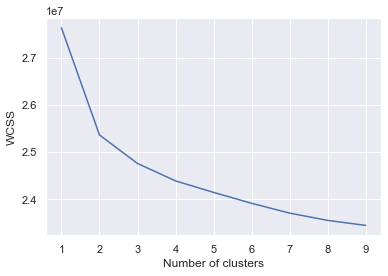

In [13]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=8)

kmeans.fit(data_log)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

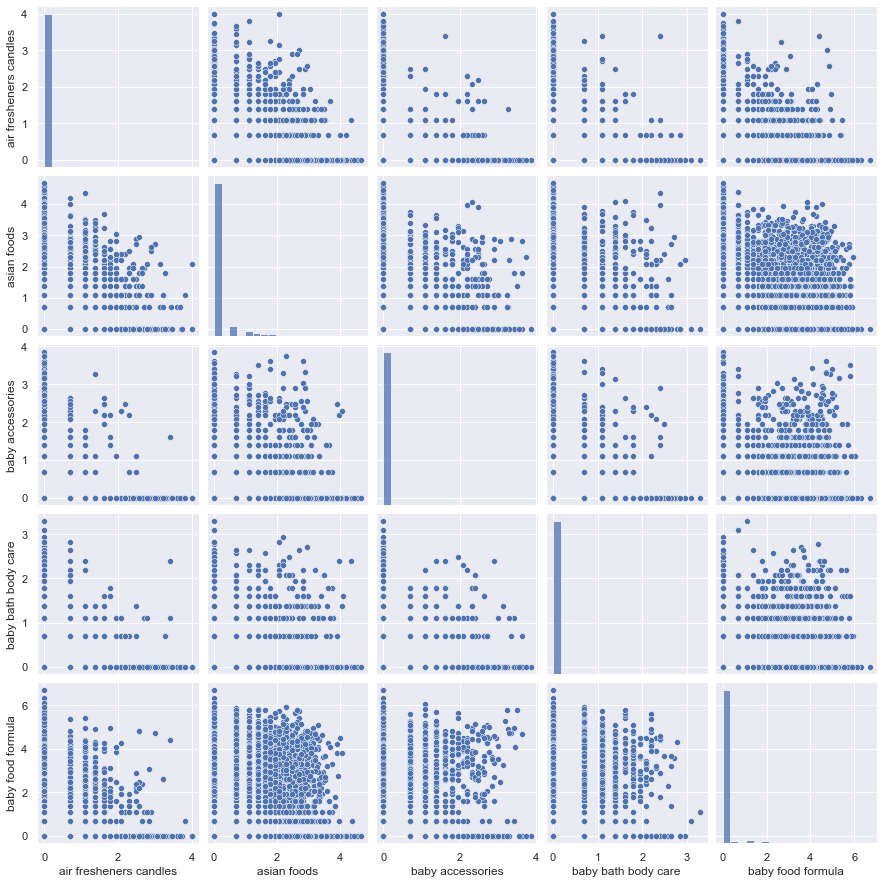

In [24]:
sns.pairplot(data_log.iloc[:,range(5)])

In [29]:
## to do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_log=pca.fit_transform(data_log)
new_data_log.shape

(206209, 10)

In [30]:
## to do get PC1 and PC2 into principal_breast_Df
principal_new_data_log = pd.DataFrame(new_data_log)
principal_new_data_log.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']

In [31]:
principal_new_data_log.tail()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
206204,-1.463837,-0.142928,0.679343,-2.099773,-0.166088,0.262919,0.043046,0.442596,-0.210416,0.018066
206205,2.867106,1.535485,-1.608519,2.465227,0.501570,-0.913437,-0.595314,-3.367122,-1.175621,-1.340081
206206,3.838414,0.004784,0.780952,-0.519271,-0.781458,0.015059,-0.784319,1.394191,-0.487425,0.342682
206207,9.770045,0.137351,-0.727684,-1.398082,0.681120,1.483380,2.012317,-0.732555,0.289789,2.502403
206208,0.523036,1.177429,0.473868,-0.876427,0.576844,0.530557,1.902247,0.670277,0.658746,0.796843


In [32]:
pca.explained_variance_ratio_

array([0.27051395, 0.05449061, 0.03053959, 0.02884184, 0.02229832,
       0.01965486, 0.01879002, 0.01793309, 0.01616694, 0.01550837])

In [42]:
## to do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_data_log=pca.fit_transform(data_log)
new_data_log.shape

(206209, 2)

In [43]:
## to do get PC1 and PC2 into principal_breast_Df
principal_new_data_log = pd.DataFrame(new_data_log)
principal_new_data_log.columns = ['pc1','pc2']

In [44]:
pca.explained_variance_ratio_

array([0.27051395, 0.05449061])

In [45]:
principal_new_data_log.tail()

,pc1,pc2
206204,-1.463837,-0.142960
206205,2.867106,1.535648
206206,3.838414,0.004841
206207,9.770045,0.137341
206208,0.523036,1.177306


In [38]:
kmeans = KMeans(n_clusters=8)

kmeans.fit(principal_new_data_log)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
labels = kmeans.predict(principal_new_data_log)
centroids = kmeans.cluster_centers_

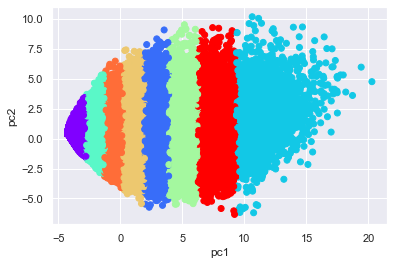

In [49]:
plt.scatter(principal_new_data_log['pc1'], principal_new_data_log['pc2'], c=labels, cmap='rainbow')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()